## NBA Player comparision

In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data consists of the shot log for the NBA season 2016/17

shot = shot = pd.read_csv("Data/NBA Shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


In [3]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.head(15)

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
0,NaN,SF,Yes,97.0,SCORED,ATL,Pullup Jump Shot,2,WAS,405.0,1:09,10/27/2016,Kent Bazemore,NaN,1,MISSED,836.0,95.0
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
2,SCORED,SG,Yes,239.0,MISSED,ATL,Jump Shot,2,WAS,223.0,1:41,10/27/2016,Kyle Korver,30.0,1,SCORED,694.0,277.0
3,SCORED,PG,Yes,102.0,SCORED,ATL,Pullup Jump Shot,2,WAS,385.0,2:16,10/27/2016,Dennis Schroder,35.0,1,SCORED,831.0,115.0
4,SCORED,PF,Yes,128.0,MISSED,ATL,Turnaround Jump Shot,2,WAS,265.0,2:40,10/27/2016,Paul Millsap,24.0,1,MISSED,805.0,235.0
5,MISSED,PG,Yes,210.0,SCORED,ATL,Pullup Jump Shot,2,WAS,267.0,3:07,10/27/2016,Dennis Schroder,27.0,1,MISSED,723.0,233.0
6,MISSED,SF,Yes,279.0,SCORED,ATL,Jump Shot,3,WAS,130.0,3:11,10/27/2016,Kent Bazemore,4.0,1,MISSED,654.0,370.0
7,MISSED,PG,Yes,58.0,SCORED,ATL,Driving Layup,2,WAS,262.0,4:01,10/27/2016,Dennis Schroder,50.0,1,MISSED,875.0,238.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
9,MISSED,PF,Yes,167.0,MISSED,ATL,Pullup Jump Shot,2,WAS,306.0,4:51,10/27/2016,Paul Millsap,47.0,1,SCORED,766.0,194.0


In [4]:
def compare_players(df, player1, player2):
    df['halfcourt_x'] =np.where(df['location_x'] < 933/2, 933 - df['location_x'], df['location_x'])
    df['halfcourt_y'] =np.where(df['location_x'] < 933/2, 500 - df['location_y'], df['location_y'])
    
    p1_df = df[df.shoot_player == player1]
    p1_x = p1_df["halfcourt_x"]
    p1_y = p1_df["halfcourt_y"]

    p2_df = shot[shot.shoot_player == player2]
    p2_x = p2_df["halfcourt_x"]
    p2_y = p2_df["halfcourt_y"]
    
    
    f = plt.figure(figsize=(94/6,50/6))
    ax = f.add_subplot(121)
    colors = np.where(p1_df['current_shot_outcome']=='SCORED', 'r', np.where(p1_df['current_shot_outcome']=='MISSED', 'b', 'g'))
    ax = plt.scatter(p1_x, p1_y, c=colors, s=10, marker= '.')
    plt.xlim(500, 950)
    plt.ylim(0, 500)
    plt.grid(True)
    plt.title(f"{player1}: {len(p1_df)}", fontsize=15)
    
    ax = f.add_subplot(122)
    colors = np.where(p2_df['current_shot_outcome']=='SCORED', 'r', np.where(p2_df['current_shot_outcome']=='MISSED', 'b', 'g'))
    ax = plt.scatter(p2_x, p2_y, c=colors, s=10, marker= '.')
    plt.grid(True)
    plt.xlim(500, 950)
    plt.ylim(0, 500)
    plt.title(f"{player2}: {len(p2_df)}", fontsize=15)

## Westbrook - Durant Comparision

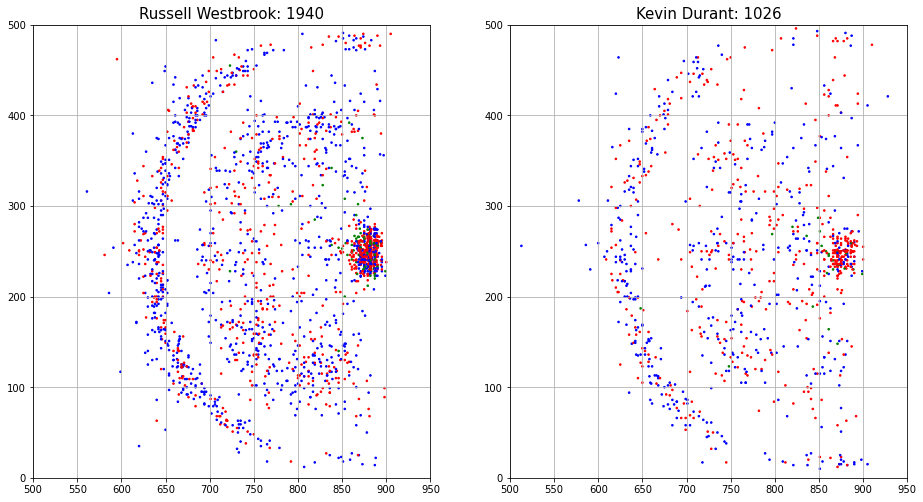

In [5]:
compare_players(shot, "Russell Westbrook", "Kevin Durant")

## Jordan - Howard Comparision

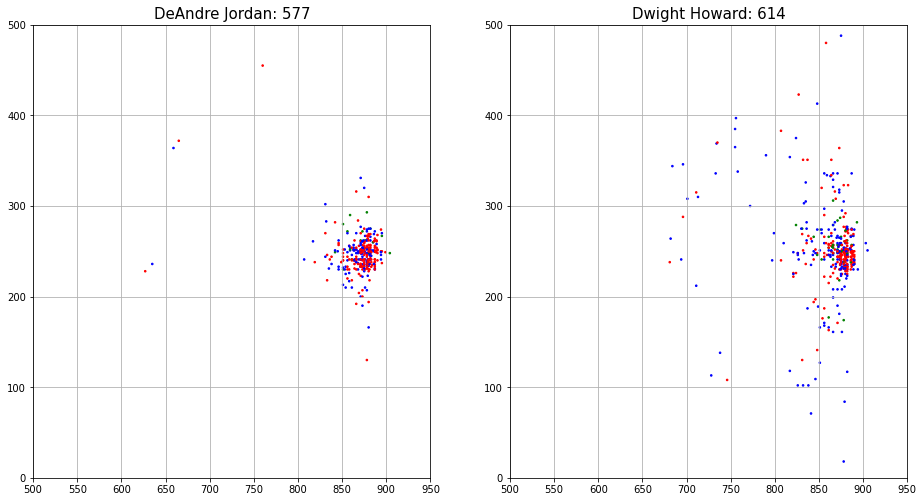

In [6]:
compare_players(shot, "DeAndre Jordan", "Dwight Howard")

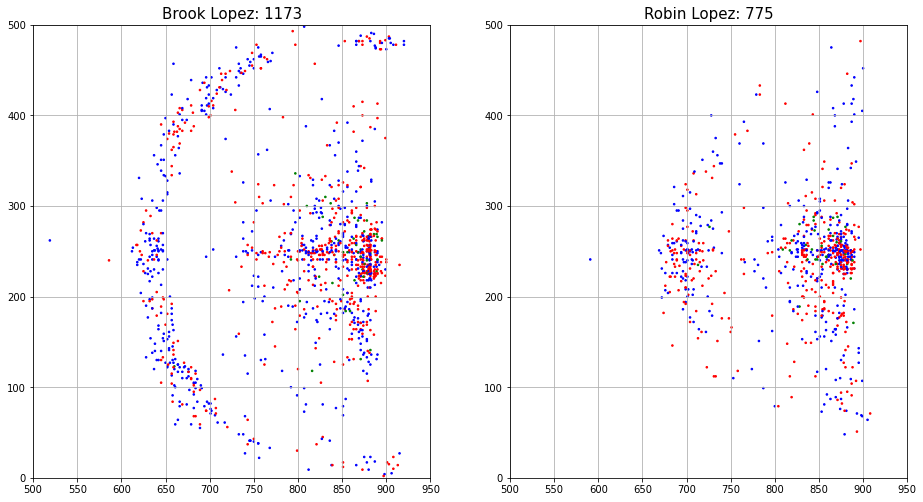

In [7]:
compare_players(shot, "Brook Lopez", "Robin Lopez")